In [1]:
#讀入資料
import pandas as pd
Orignal = pd.read_csv('HW3_hr-analytics.csv')

#判斷格式是否為數字
Format = [Orignal[Orignal.columns[i]].dtype for i in range(Orignal.shape[1])]
FormatIsntNumber = list()
print("Colums's format is not number:", end = ' ')
for i in range(len(Format)):
    if Format[i] == 'O':
        print(Orignal.columns[i], end = ' ')
        FormatIsntNumber.append(Orignal.columns[i])

#判斷是否有缺失
missColums = list(set(Orignal.columns).symmetric_difference(set(Orignal.dropna(axis = 1).columns)))
if len(missColums):
    print("\n\nColums with miss value:", end = ' ')
    for miss in missColums:
        print(miss, end = ' ')
else:
    print("\n\nNo Miss value.")

Orignal

Colums's format is not number: sales salary 

No Miss value.


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [2]:
#將非數字資料編碼成數字
from sklearn import preprocessing
import numpy as np
Data = Orignal.copy()

for i in range(len(FormatIsntNumber)):
    encode = preprocessing.LabelEncoder().fit(Orignal[FormatIsntNumber[i]].dropna())
    if not FormatIsntNumber[i] in missColums:
        Data[FormatIsntNumber[i]] = encode.transform(Orignal[FormatIsntNumber[i]])
    else:
        buffer = encode.transform(Orignal[FormatIsntNumber[i]].dropna())
        index = 0
        result = list()
        for j in range(Orignal.shape[0]):
            if str(Orignal[FormatIsntNumber[i]][j])!='nan':
                result.append(buffer[index])
                index += 1
            else:
                result.append(np.nan)
        Data[FormatIsntNumber[i]] = result

print("Encode Data")
Data

Encode Data


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,8,1
14995,0.37,0.48,2,160,3,0,1,0,8,1
14996,0.37,0.53,2,143,3,0,1,0,8,1
14997,0.11,0.96,6,280,4,0,1,0,8,1


In [3]:
if len(missColums):
    Data = Data.fillna(Data.mean())
    print("fill miss Data")
else:
    print("No Miss Value.")

No Miss Value.


In [4]:
from sklearn.model_selection import train_test_split
trainData, testData, a, b = train_test_split(Data, range(Data.shape[0]), test_size=0.3, random_state=None)
print("Train Data")
trainData

Train Data


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
2878,0.74,0.59,4,155,3,0,0,0,8,2
8488,0.66,0.53,4,162,3,0,0,0,7,1
4912,0.66,0.63,5,264,5,0,0,0,2,1
2207,0.51,0.69,3,145,2,1,0,0,1,2
11375,1.00,0.93,5,167,3,0,0,0,7,2
...,...,...,...,...,...,...,...,...,...,...
6734,0.53,0.50,3,231,3,0,0,0,7,1
6669,0.56,0.85,5,230,3,0,0,0,2,2
11002,0.13,0.50,3,137,5,0,0,0,1,1
3893,0.67,0.95,4,241,4,0,0,0,2,2


In [5]:
print("Test Data")
testData

Test Data


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
12971,0.59,0.97,3,257,3,0,0,0,5,1
3741,0.66,0.40,2,155,5,1,0,0,8,2
14434,0.87,0.90,5,252,5,0,1,0,0,1
1786,0.43,0.53,2,143,3,0,1,0,2,2
8436,0.65,0.64,5,206,3,0,0,0,9,1
...,...,...,...,...,...,...,...,...,...,...
8294,0.34,0.51,3,105,3,0,0,0,8,2
9846,0.67,0.50,5,219,3,0,0,0,0,2
10109,0.95,0.65,3,273,4,0,0,0,3,1
2671,0.97,0.80,3,169,3,0,0,0,5,1


In [6]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt


def fromDataframeToPrediectResult(comment, trainData, testData):
    trainLabel, testLabel = list(trainData['left']), list(testData['left'])
    trainData = np.array(trainData.drop(['left'], axis = 1))
    testData = np.array(testData.drop(['left'], axis = 1))
    #訓練
    LogisticModel = LogisticRegression(max_iter = 1000).fit(trainData, trainLabel)
    #預測
    LogisticModelResult = LogisticModel.predict(testData)

    diff = 0
    for i in range(len(testLabel)):
        if testLabel[i] != LogisticModelResult[i]:
            diff += 1
    print(comment, "Data with accuracy:",round((1-diff/testData.shape[0])*100,2),"%")

fromDataframeToPrediectResult("Orignal", trainData, testData)

Orignal Data with accuracy: 77.31 %


In [7]:
#將每個特徵獨立訓練觀察結果
for i in range(Data.shape[1]):
    if Data.columns[i] != 'left':
        SignaltrainData = pd.DataFrame(trainData[[trainData.columns[i],'left']])
        SignaltestData = pd.DataFrame(testData[[testData.columns[i],'left']])
        fromDataframeToPrediectResult(Data.columns[i], SignaltrainData, SignaltestData)


satisfaction_level Data with accuracy: 77.87 %
last_evaluation Data with accuracy: 76.6 %
number_project Data with accuracy: 76.6 %
average_montly_hours Data with accuracy: 76.6 %
time_spend_company Data with accuracy: 75.02 %
Work_accident Data with accuracy: 76.6 %
promotion_last_5years Data with accuracy: 76.6 %
sales Data with accuracy: 76.6 %
salary Data with accuracy: 76.6 %


satisfaction_level      -0.388375
last_evaluation          0.006567
number_project           0.023787
average_montly_hours     0.071287
time_spend_company       0.144822
Work_accident           -0.154622
left                     1.000000
promotion_last_5years   -0.061788
sales                    0.032105
salary                  -0.001294
Name: left, dtype: float64


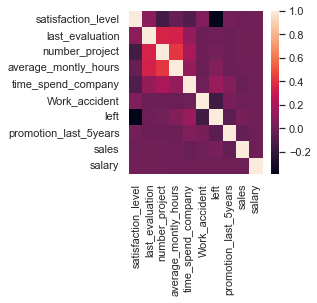

In [8]:
# 畫出相關係數矩陣觀察觀察各個變數與left的關係
import seaborn as sns
correlation = Data.corr()
sns.set(rc = {'figure.figsize':(3,3)})
sns.heatmap(correlation, annot = False)

print(correlation['left'])

# 針對各項特徵與預測結果探討

從上方的相關係數矩陣圖可以發現，和是否離職和各項特徵的相關係數大多介於0.15~-0.2之間，顯示**各項特徵和是否離職沒有太多的關係**。

唯有satisfaction_level的相關係數為-0.38，但仍僅屬於中度相關。

接者使用各項特徵單獨預測後得到的結果發現和原本預測的結果都非常接近。

## 特徵轉換 - 將所有資料轉成True False


1.離職率是一個0/1的特徵

2.透過Logistic Regession的方式訓練，最後會將Regession後的結果放入sigmoid function判斷

因此希望將資料的往兩極分布，使其更容易判斷出結果

所以決定將所有特徵都轉換成True False的形式，以mean作為區分條件

但是最後**結果顯示仍和一般的情況的結果相同**。

In [9]:
#轉成二進制 需要等待約5~10秒鐘才能完成
BinaryData = Data.copy()
for i in range(len(Data.columns)):
    temp = list()
    for j in range(Data.shape[0]):
        temp.append(0 if Data[Data.columns[i]][j] < Data[Data.columns[i]].mean() else 1)
    BinaryData[Data.columns[i]] = temp
#分開訓練與測試資料
BinaryTrainData, BinaryTestData, a, b = train_test_split(BinaryData, range(BinaryData.shape[0]), test_size=0.3, random_state=None)
#測試結果
fromDataframeToPrediectResult("Binary", BinaryTrainData, BinaryTestData)

Binary Data with accuracy: 74.87 %
